<a href="https://colab.research.google.com/github/NatashaB-randao/Formacao-Machine-Learning-Specialist/blob/main/ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow

In [25]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

import tensorflow as tf
from tensorflow import keras

import io

In [4]:
tf.__version__

'2.17.1'

In [5]:
%load_ext tensorboard

In [6]:
logdir='log'

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [11]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 35ms/step - accuracy: 0.8904 - loss: 0.3524
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9843 - loss: 0.0483
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.9890 - loss: 0.0345
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.9925 - loss: 0.0245
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9947 - loss: 0.0170


In [14]:
import numpy as np

y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1) # Get class labels with highest probability

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [15]:
classes=[0,1,2,3,4,5,6,7,8,9]

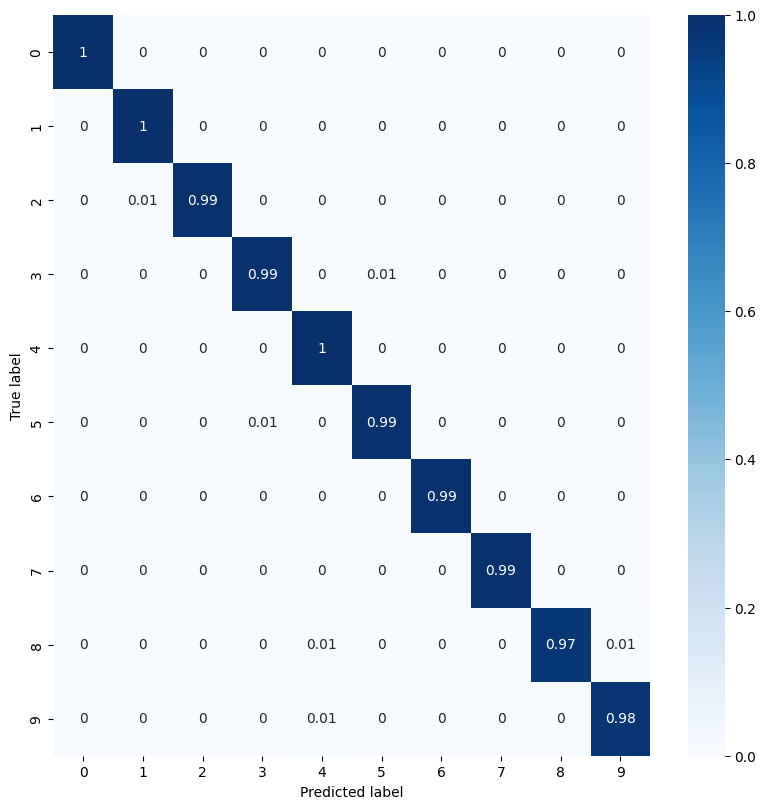

In [16]:
con_mat = tf.math.confusion_matrix(labels=y_true,predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [19]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
# Corrected: Adding layers to model1 instead of model
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(train_images, train_labels, epochs=5, callbacks=[tensorboard_callback])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 37ms/step - accuracy: 0.8890 - loss: 0.3538
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 35ms/step - accuracy: 0.9845 - loss: 0.0510
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 36ms/step - accuracy: 0.9887 - loss: 0.0360
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 33ms/step - accuracy: 0.9919 - loss: 0.0257
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9940 - loss: 0.0190


In [22]:
file_writer = tf.summary.create_file_writer(logdir + '/cm')

def log_confusion_matrix(epoch, logs):
  test_pred_raw = model1.predict(test_images)
  test_pred = np.argmax(test_pred_raw, axis=1)

  con_mat = tf.math.confusion_matrix(labels=test_labels,predictions=test_pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  buf = io.BytesIO()
  plt.savefig(buf, format='png')

  plt.close(figure)
  buf.seek(0)
  imagel = tf.image.decode_png(buf.getvalue(), channels=4)
  imagel = tf.expand_dims(imagel, 0)


  with file_writer.as_default():
    tf.summary.image("Confusion Matrix", imagel, step=epoch)


logdir = 'logs/images'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [26]:
model1.fit(
    train_images,
    train_labels,
    epochs=5, callbacks=[tensorboard_callback, cm_callback],
    validation_data=(test_images, test_labels),
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9962 - loss: 0.0117 - val_accuracy: 0.9892 - val_loss: 0.0370
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 119s 58ms/step - accuracy: 0.9971 - loss: 0.0094 - val_accuracy: 0.9903 - val_loss: 0.0394
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 107s 39ms/step - accuracy: 0.9975 - loss: 0.0084 - val_accuracy: 0.9928 - val_loss: 0.0341
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 37ms/step - accuracy: 0.9977 - loss: 0.0072 - val_accuracy: 0.9912 - val_loss: 0.0351
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9982 - loss: 0.0054 - val_accuracy: 0.9877 - val_loss: 0.0528
